In [2]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import ot
import cv2 as cv
import matplotlib.pylab as pl

2023-02-13 16:12:34.616460: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 16:12:34.855785: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-13 16:12:35.861100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/nirmala/anaconda3/envs/tf/lib/
2023-02-13 16:12:35.861218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinf

In [2]:

f1 = 1 - plt.imread('plus.png')[:, :, 2]
f2 = 1 - plt.imread('tooth.png')[:, :, 2]
f3 = 1 - plt.imread('heart.png')[:, :, 2]
f4 = 1 - plt.imread('duck.png')[:, :, 2]

f1 = f1 / np.sum(f1)
f2 = f2 / np.sum(f2)
f3 = f3 / np.sum(f3)
f4 = f4 / np.sum(f4)
A = np.array([f1, f2, f3, f4])

nb_images = 5

# those are the four corners coordinates that will be interpolated by bilinear
# interpolation
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))

In [7]:
f1-f2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

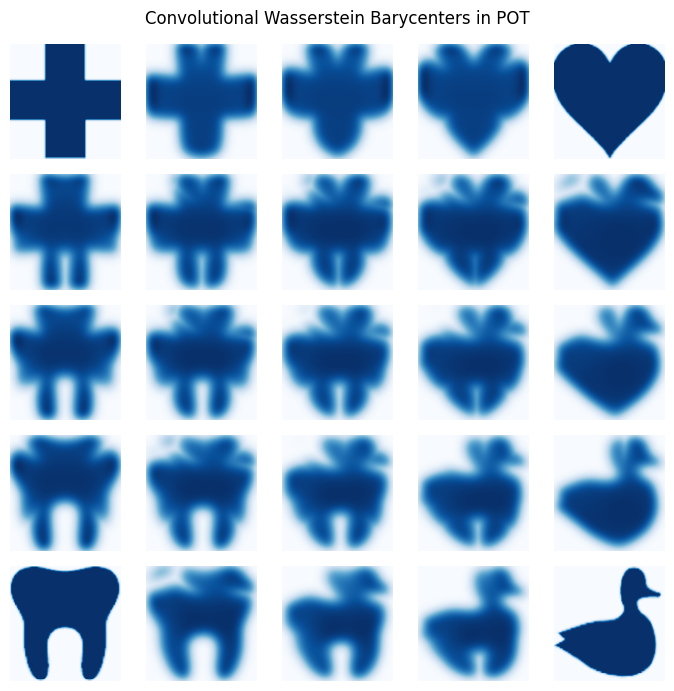

In [4]:
fig, axes = plt.subplots(nb_images, nb_images, figsize=(7, 7))
plt.suptitle('Convolutional Wasserstein Barycenters in POT')
cm = 'Blues'
# regularization parameter
reg = 0.004
for i in range(nb_images):
    for j in range(nb_images):
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            axes[i, j].imshow(f1, cmap=cm)
        elif i == 0 and j == (nb_images - 1):
            axes[i, j].imshow(f3, cmap=cm)
        elif i == (nb_images - 1) and j == 0:
            axes[i, j].imshow(f2, cmap=cm)
        elif i == (nb_images - 1) and j == (nb_images - 1):
            axes[i, j].imshow(f4, cmap=cm)
        else:
            # call to barycenter computation
            axes[i, j].imshow(
                ot.bregman.convolutional_barycenter2d(A, reg, weights),
                cmap=cm
            )
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

In [100]:
f1 = 1 - plt.imread('0001.jpg')[:, :, 2]
f2 = 1 - plt.imread('0007.jpg')[:, :, 2]
f3 = 1 - plt.imread('0008.jpg')[:, :, 2]
f4 = 1 - plt.imread('0018.jpg')[:, :, 2]

In [101]:
f2=cv.resize(f2,(89,305))

f3=cv.resize(f3,(89,305))

f4=cv.resize(f4,(89,305))
f2.shape,f3.shape,f4.shape

((305, 89), (305, 89), (305, 89))

In [102]:


f1 = f1 / np.sum(f1)
f2 = f2 / np.sum(f2)
f3 = f3 / np.sum(f3)
f4 = f4 / np.sum(f4)
A = np.array([f1, f2, f3, f4])

nb_images = 5

# those are the four corners coordinates that will be interpolated by bilinear
# interpolation
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))

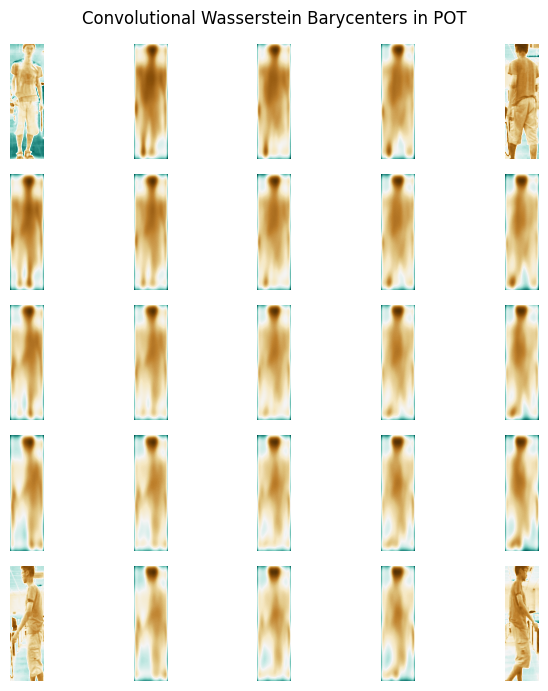

In [103]:
fig, axes = plt.subplots(nb_images, nb_images, figsize=(7, 7))
plt.suptitle('Convolutional Wasserstein Barycenters in POT')
cm = 'BrBG_r'
# regularization parameter
reg = 0.004
for i in range(nb_images):
    for j in range(nb_images):
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            axes[i, j].imshow(f1, cmap=cm)
        elif i == 0 and j == (nb_images - 1):
            axes[i, j].imshow(f3, cmap=cm)
        elif i == (nb_images - 1) and j == 0:
            axes[i, j].imshow(f2, cmap=cm)
        elif i == (nb_images - 1) and j == (nb_images - 1):
            axes[i, j].imshow(f4, cmap=cm)
        else:
            # call to barycenter computation
            axes[i, j].imshow(
                ot.bregman.convolutional_barycenter2d(A, reg, weights),
                cmap=cm
            )
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

In [37]:
v1

array([1, 0, 0, 0])

In [38]:
weights

array([0., 0., 0., 1.])

In [39]:
tx

1.0

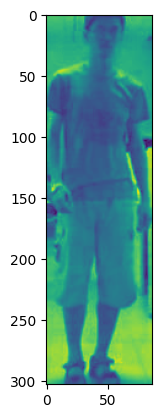

In [22]:
anchor = plt.imread('0001.jpg')[2:,2:,2]
anchor = anchor / np.sum(anchor)
plt.imshow(anchor)

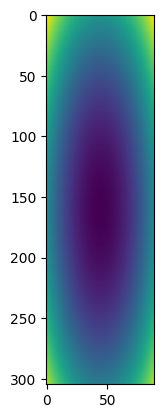

In [25]:
b1=1-b1
plt.imshow(b1)

In [95]:
weights

array([0.6, 0.4])

In [4]:
#reg =0.0002
#alpha=0.2
weights=np.array([0.5,0.5])

In [ ]:
reg=0.002
anchor =plt.imread('0001.jpg')[:, :,:]

anchor = anchor / np.sum(anchor)

A=np.array([anchor,anchor])
b1=ot.bregman.convolutional_barycenter2d(A, reg,weights)
b1


In [38]:
anchor =plt.imread('0001.jpg')[:, :,:]

anchor.shape

(305, 89, 3)

In [36]:
anchor =plt.imread('0001.jpg')[:, :,2]
anchor

array([[126, 126, 126, ..., 123, 123, 123],
       [125, 125, 125, ..., 122, 122, 122],
       [123, 123, 123, ..., 121, 121, 121],
       ...,
       [132, 130, 127, ..., 117, 119, 121],
       [129, 127, 125, ..., 114, 114, 118],
       [123, 122, 120, ..., 111, 110, 115]], dtype=uint8)

In [37]:
anchor.shape

(305, 89)

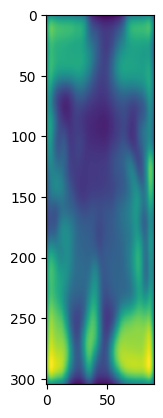

In [8]:
plt.imshow(b1)

In [7]:
anchor

array([[5.43567589e-05, 5.43567589e-05, 5.43567589e-05, ...,
        5.30625504e-05, 5.30625504e-05, 5.30625504e-05],
       [5.39253561e-05, 5.39253561e-05, 5.39253561e-05, ...,
        5.26311475e-05, 5.26311475e-05, 5.26311475e-05],
       [5.30625504e-05, 5.30625504e-05, 5.30625504e-05, ...,
        5.21997447e-05, 5.21997447e-05, 5.21997447e-05],
       ...,
       [5.69451760e-05, 5.60823703e-05, 5.47881618e-05, ...,
        5.04741333e-05, 5.13369390e-05, 5.21997447e-05],
       [5.56509675e-05, 5.47881618e-05, 5.39253561e-05, ...,
        4.91799248e-05, 4.91799248e-05, 5.09055361e-05],
       [5.30625504e-05, 5.26311475e-05, 5.17683418e-05, ...,
        4.78857162e-05, 4.74543134e-05, 4.96113276e-05]])

In [98]:
#plt.imshow(anchor)

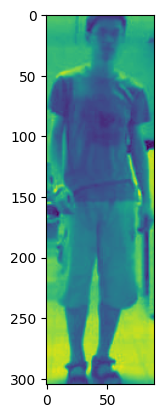

In [18]:
a =  plt.imread('0001.jpg')[:,:,1]
plt.imshow(a)

In [6]:
reg=0.002
anchor =  plt.imread('0001.jpg')[:,:,2]
pos = plt.imread('0002.jpg')[:,:,2]
pos=cv.resize(pos,(89,305))
anchor = anchor / np.sum(anchor)
pos = pos / np.sum(pos)
A=np.array([anchor,pos])
b2=ot.bregman.convolutional_barycenter2d(A, reg,weights)
b2

array([[2.76129310e-05, 3.27062078e-05, 3.61612656e-05, ...,
        3.49532767e-05, 3.15630222e-05, 2.66160748e-05],
       [2.93697944e-05, 3.47875812e-05, 3.84631914e-05, ...,
        3.71620224e-05, 3.35595325e-05, 2.83009973e-05],
       [3.10175215e-05, 3.67397367e-05, 4.06223276e-05, ...,
        3.92285567e-05, 3.54274925e-05, 2.98773887e-05],
       ...,
       [3.36323582e-05, 3.98467014e-05, 4.41058113e-05, ...,
        4.22773020e-05, 3.82762229e-05, 3.23388623e-05],
       [3.16840165e-05, 3.75398532e-05, 4.15539694e-05, ...,
        3.97438499e-05, 3.59837106e-05, 3.04030053e-05],
       [2.96473255e-05, 3.51280620e-05, 3.88856399e-05, ...,
        3.71124946e-05, 3.36023267e-05, 2.83918617e-05]])

In [10]:
pos

array([[4.99407200e-05, 4.99407200e-05, 4.99407200e-05, ...,
        5.03339540e-05, 4.83677839e-05, 4.60083798e-05],
       [5.07271880e-05, 5.03339540e-05, 5.03339540e-05, ...,
        4.79745499e-05, 4.60083798e-05, 4.56151458e-05],
       [5.07271880e-05, 5.07271880e-05, 5.07271880e-05, ...,
        4.56151458e-05, 4.40422097e-05, 4.56151458e-05],
       ...,
       [4.79745499e-05, 4.75813159e-05, 4.75813159e-05, ...,
        4.56151458e-05, 4.52219118e-05, 4.44354438e-05],
       [4.79745499e-05, 4.75813159e-05, 4.79745499e-05, ...,
        4.60083798e-05, 4.56151458e-05, 4.48286778e-05],
       [4.87610179e-05, 4.83677839e-05, 4.87610179e-05, ...,
        4.71880819e-05, 4.64016138e-05, 4.60083798e-05]])

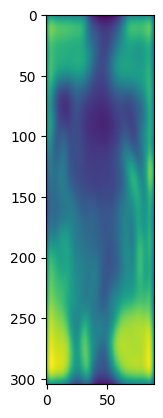

In [112]:
plt.imshow(b2)

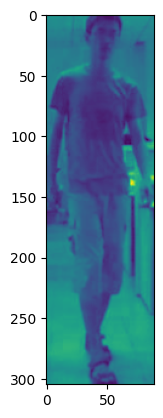

In [45]:
plt.imshow(pos)

In [104]:
'''A=np.array([pos,anchor])
b21=ot.bregman.convolutional_barycenter2d(A, reg)
b21'''

'A=np.array([pos,anchor])\nb21=ot.bregman.convolutional_barycenter2d(A, reg)\nb21'

In [40]:
reg =0.002
anchor = plt.imread('0001.jpg')[:, :, 2]
neg = plt.imread('neg3.jpg')[:, :, 2]
neg=cv.resize(neg,(89,305))
anchor = anchor / np.sum(anchor)
neg = neg / np.sum(neg)
A=np.array([anchor,neg])
b3=ot.bregman.convolutional_barycenter2d(A, reg,weights)
b3

array([[2.22059053e-05, 2.63626122e-05, 2.91313886e-05, ...,
        2.66824815e-05, 2.44608606e-05, 2.08606887e-05],
       [2.36083148e-05, 2.80229700e-05, 3.09604172e-05, ...,
        2.83842438e-05, 2.60213162e-05, 2.21949210e-05],
       [2.49128143e-05, 2.95670927e-05, 3.26611998e-05, ...,
        2.99795833e-05, 2.74834235e-05, 2.34452187e-05],
       ...,
       [3.61119604e-05, 4.27368420e-05, 4.72111087e-05, ...,
        4.23565948e-05, 3.84488502e-05, 3.25525678e-05],
       [3.39903856e-05, 4.02295345e-05, 4.44460067e-05, ...,
        3.99146582e-05, 3.62336132e-05, 3.06782072e-05],
       [3.17732405e-05, 3.76087838e-05, 4.15551566e-05, ...,
        3.73568714e-05, 3.39127890e-05, 2.87141279e-05]])

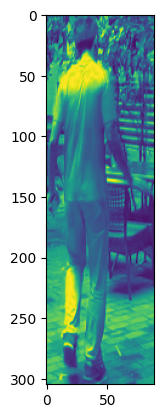

In [41]:
plt.imshow(neg)

In [43]:
weights

array([0.5, 0.5])

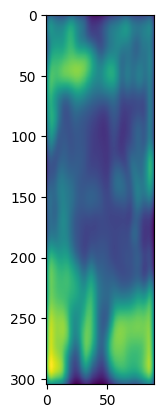

In [42]:
plt.imshow(b3)

In [108]:
#plt.imshow(neg)

In [44]:
dist_pos=np.linalg.norm(b1-b2)
dist_neg = np.linalg.norm(b1-b3)
dist_pos,dist_neg

(0.0007136056357326751, 0.00126749384750056)

([], [])

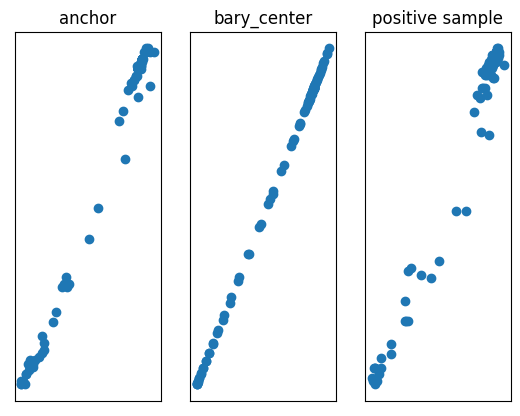

In [146]:
plt.subplot(1, 3, 1)
plt.scatter(anchor[0],anchor[1])
plt.title("anchor")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.scatter(b2[0],b2[1])
plt.title("bary_center")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.scatter(pos[0],pos[1])
plt.title("positive sample")
plt.xticks([])
plt.yticks([])

([], [])

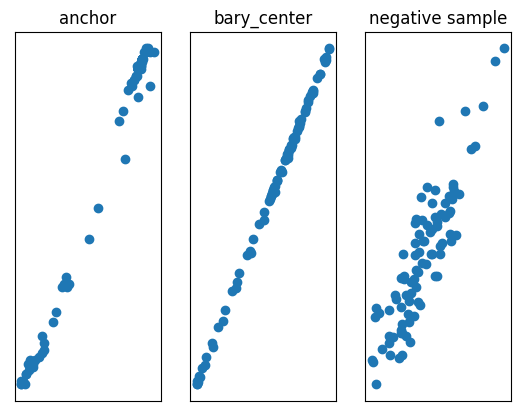

In [152]:
plt.subplot(1, 3, 1)
plt.scatter(anchor[0],anchor[1])
plt.title("anchor")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.scatter(b3[0],b3[1])
plt.title("bary_center")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.scatter(neg[0],neg[1])
plt.title("negative sample")
plt.xticks([])
plt.yticks([])

([], [])

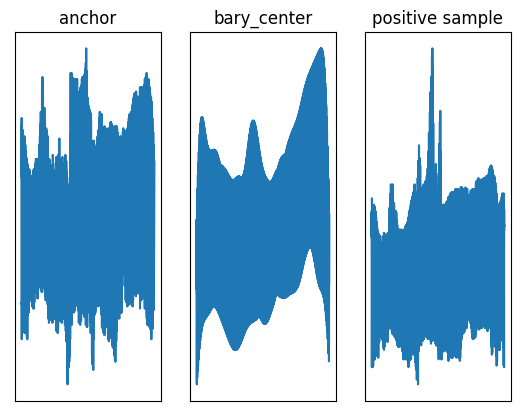

In [149]:
anchor1=anchor.flatten()
bary=b2.flatten()
pos1=pos.flatten()
plt.subplot(1, 3, 1)
plt.plot(anchor1)
plt.title("anchor")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.plot(bary)
plt.title("bary_center")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.plot(pos1)
plt.title("positive sample")
plt.xticks([])
plt.yticks([])

([], [])

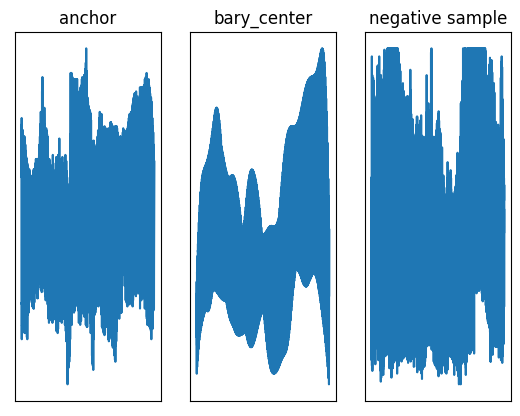

In [151]:
anchor1=anchor.flatten()
bary3=b3.flatten()
neg1=neg.flatten()
plt.subplot(1, 3, 1)
plt.plot(anchor1)
plt.title("anchor")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 2)
plt.plot(bary3)
plt.title("bary_center")
plt.xticks([])
plt.yticks([])
plt.subplot(1, 3, 3)
plt.plot(neg1)
plt.title("negative sample")
plt.xticks([])
plt.yticks([])

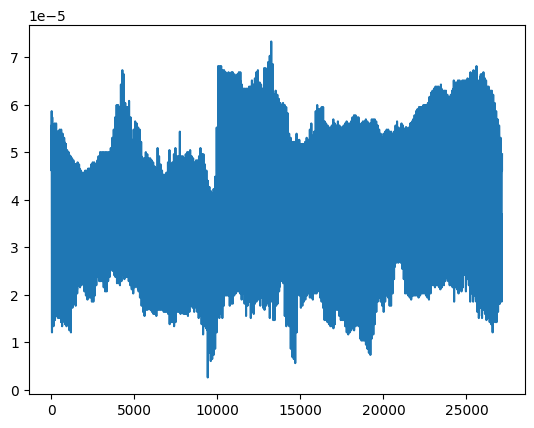

In [116]:
anchor1=anchor.flatten()
plt.plot(anchor1)
plt.show()

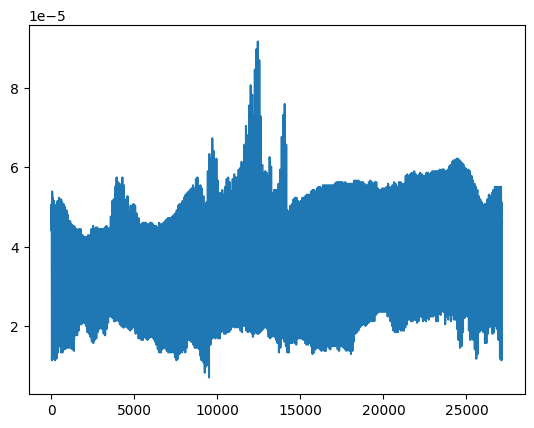

In [121]:
pos1=pos.flatten()
plt.plot(pos1)
plt.show()

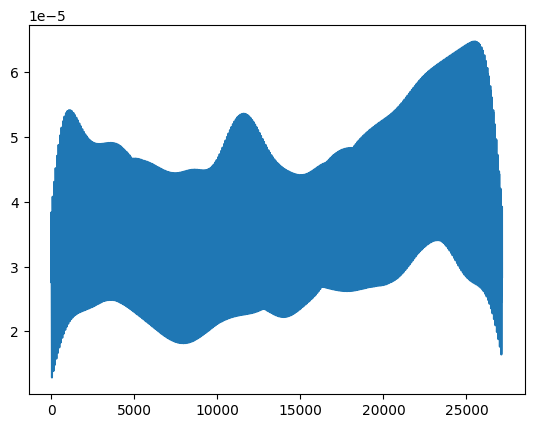

In [122]:
b21=b2.flatten()
plt.plot(b21)
plt.show()

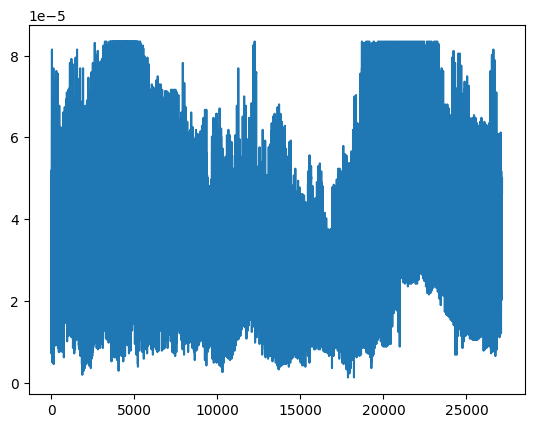

In [117]:
neg1=neg.flatten()
plt.plot(neg1)
plt.show()

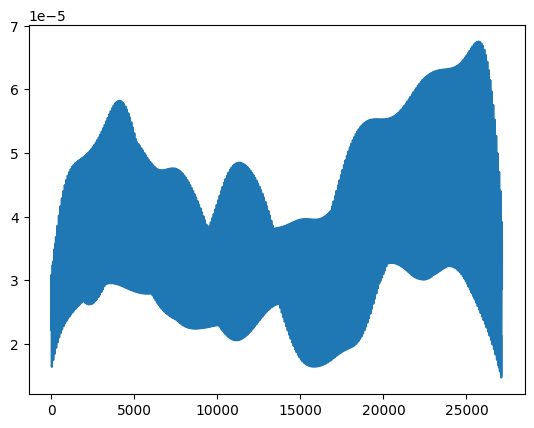

In [115]:
b31=b3.flatten()
plt.plot(b31)
plt.show()
#plt.imshow(b4)

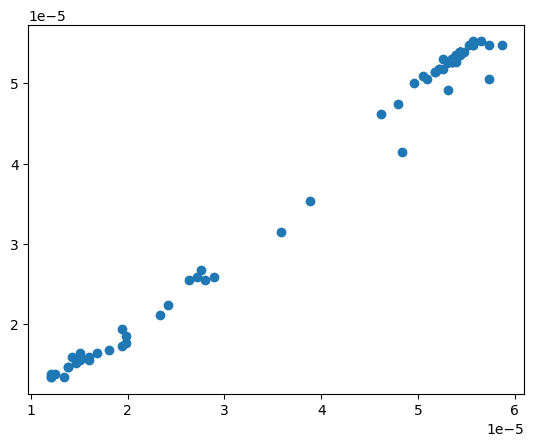

In [127]:
plt.scatter(anchor[0],anchor[1])
#plt.scatter(b2[0],b2[1])
plt.show()

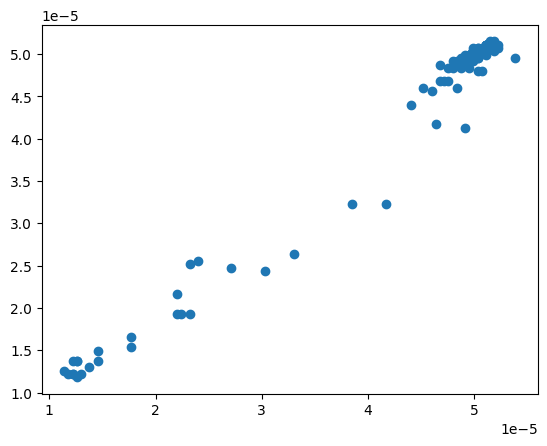

In [123]:
plt.scatter(pos[0],pos[1])
plt.show()

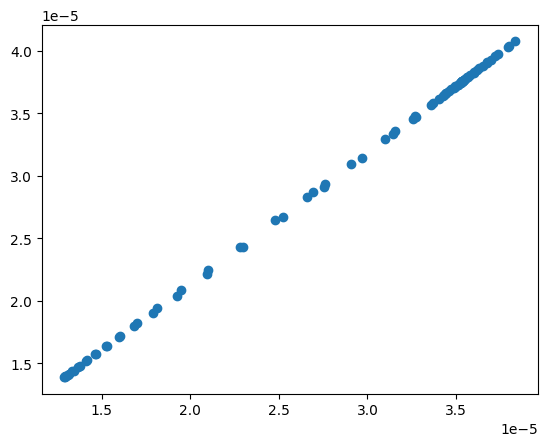

In [126]:
plt.scatter(b2[0],b2[1])
plt.show()

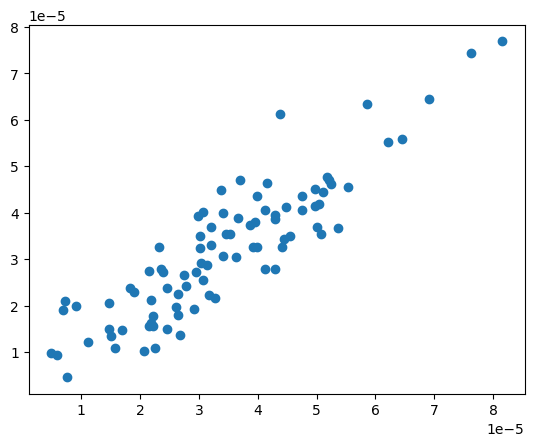

In [119]:
plt.scatter(neg[0],neg[1])
plt.show()

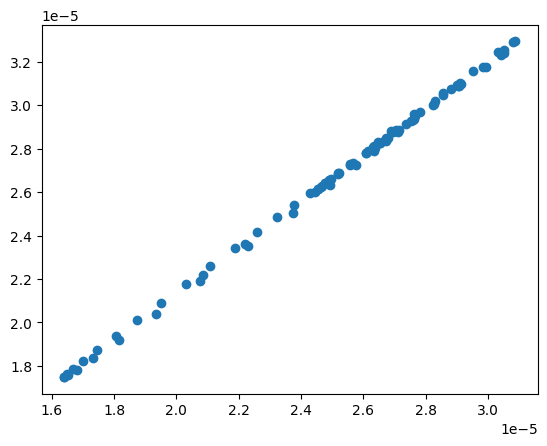

In [120]:
plt.scatter(b3[0],b3[1])
plt.show()